In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
import matplotlib.style as style
warnings.filterwarnings(action='ignore')

Reading Clean Dataset

In [2]:
data = pd.read_csv("CleanedData/Cleaned_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,1,54.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,2,47.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1


In [4]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,233.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,124.0,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1


### Some Data Analysis:

In [5]:
categorical = ['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']
categorical

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

These were some Values from DataSet:

##### Using **PyChart** to analyse the Values

In [6]:
style.use('seaborn-darkgrid')

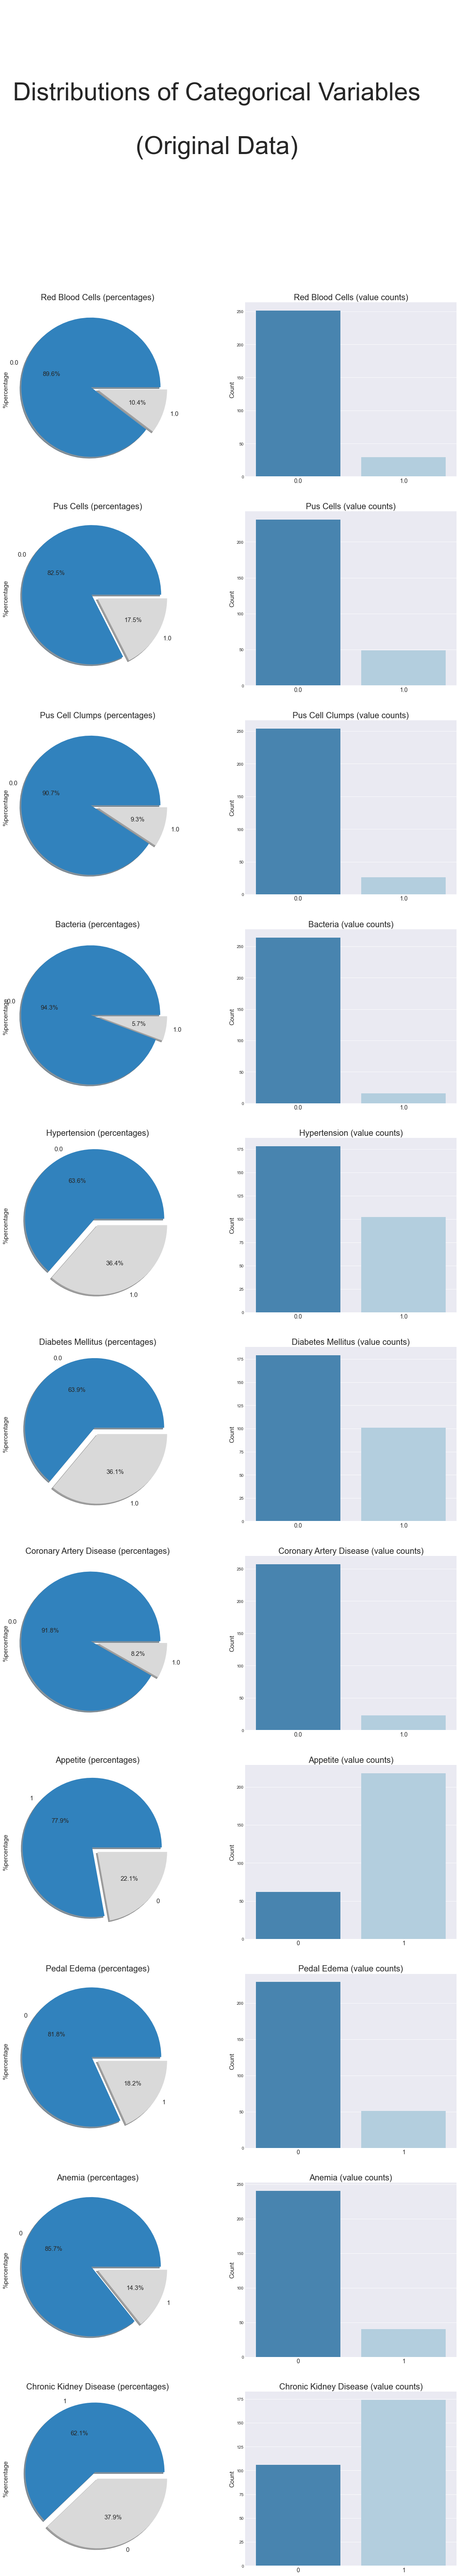

In [7]:
n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 100))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n\n(Original Data)', 
                    fontsize=60)

for i in range(len(categorical)):
    column=categorical[i]
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i,0],
            colormap="tab20c",fontsize=15,shadow=True,explode=[0.1,0])
    axes[i,0].set_ylabel('%percentage',fontsize=15)
    axes[i,0].set_title(column+' (percentages)', fontsize=20)
    graph2=sns.countplot(x=column,data=data,palette='Blues_r',ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=15)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=14)
    axes[i,1].set_title(column+' (value counts)', fontsize=20)
    

graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[10,0],
            colormap='tab20c',fontsize=15,shadow=True,explode=[0.1,0])
axes[10,0].set_ylabel("%percentage",fontsize=15)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=20)


graph2=sns.countplot(x='Chronic Kidney Disease',data=data,palette='Blues_r',ax=axes[10,1])
axes[10,1].set_xlabel(None,fontsize=15)
axes[10,1].set_ylabel("Count",fontsize=15)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels(), fontsize=14)
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize=20)

plt.show()

#### Now we'll See the correlation between the Features and there Values:

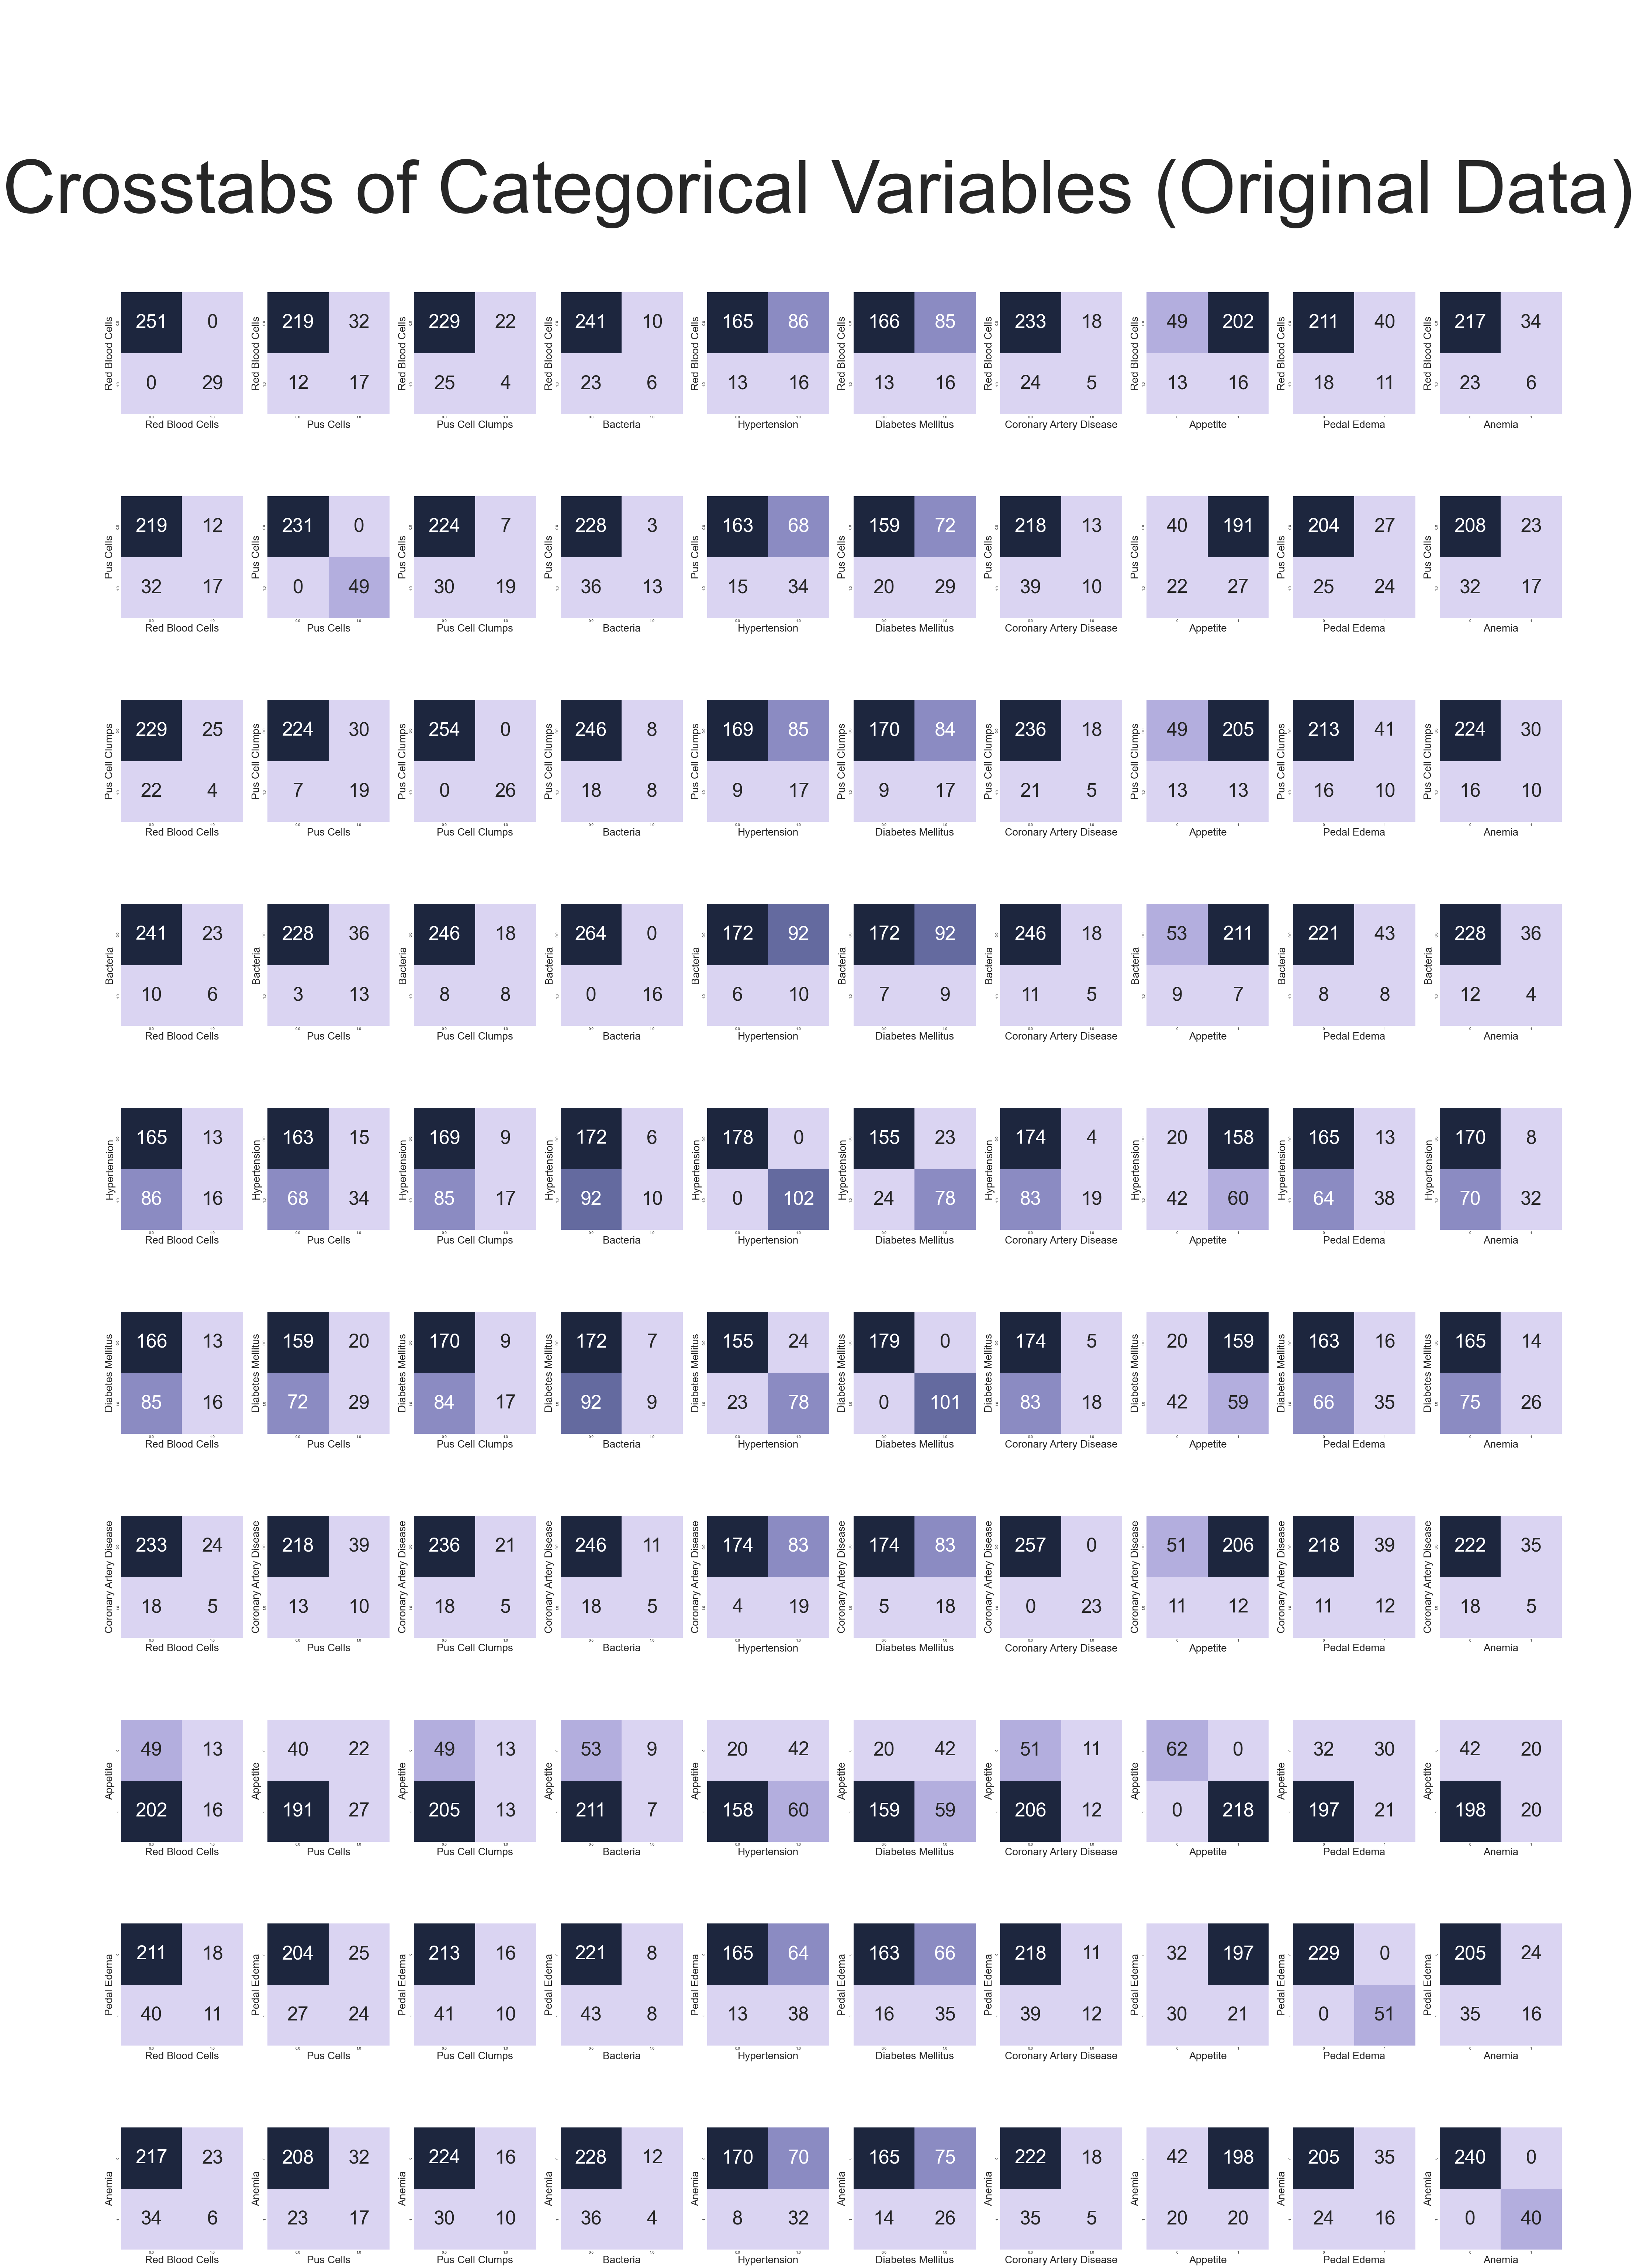

In [8]:
n_rows, n_cols = (10,10)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCrosstabs of Categorical Variables (Original Data)\n', fontsize=200)

for i in range(10):
    for j in range(10):
        sns.heatmap(#pd.crosstab(onehotdata.iloc[:,i+14],onehotdata.iloc[:,j+14]),
                    pd.crosstab(data[categorical[i]],data[categorical[j]]),
                    ax=axes[i,j],
                    cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                    square='True',
                    cbar=False,
                    annot=True,
                    annot_kws={'fontsize':52},
                    fmt='d')
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=28)
        
        axes[i,j].set_ylabel(axes[i,j].get_ylabel(),fontsize=28)
        
plt.show()

Now That was for the Categorical Variables that we changed to 0's and 1's.

#### Now we'll analyse the Numerical Variables and there Values:

In [12]:
numeric = ['Age (years)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']
numeric

['Age (years)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [13]:
style.use('seaborn-darkgrid')

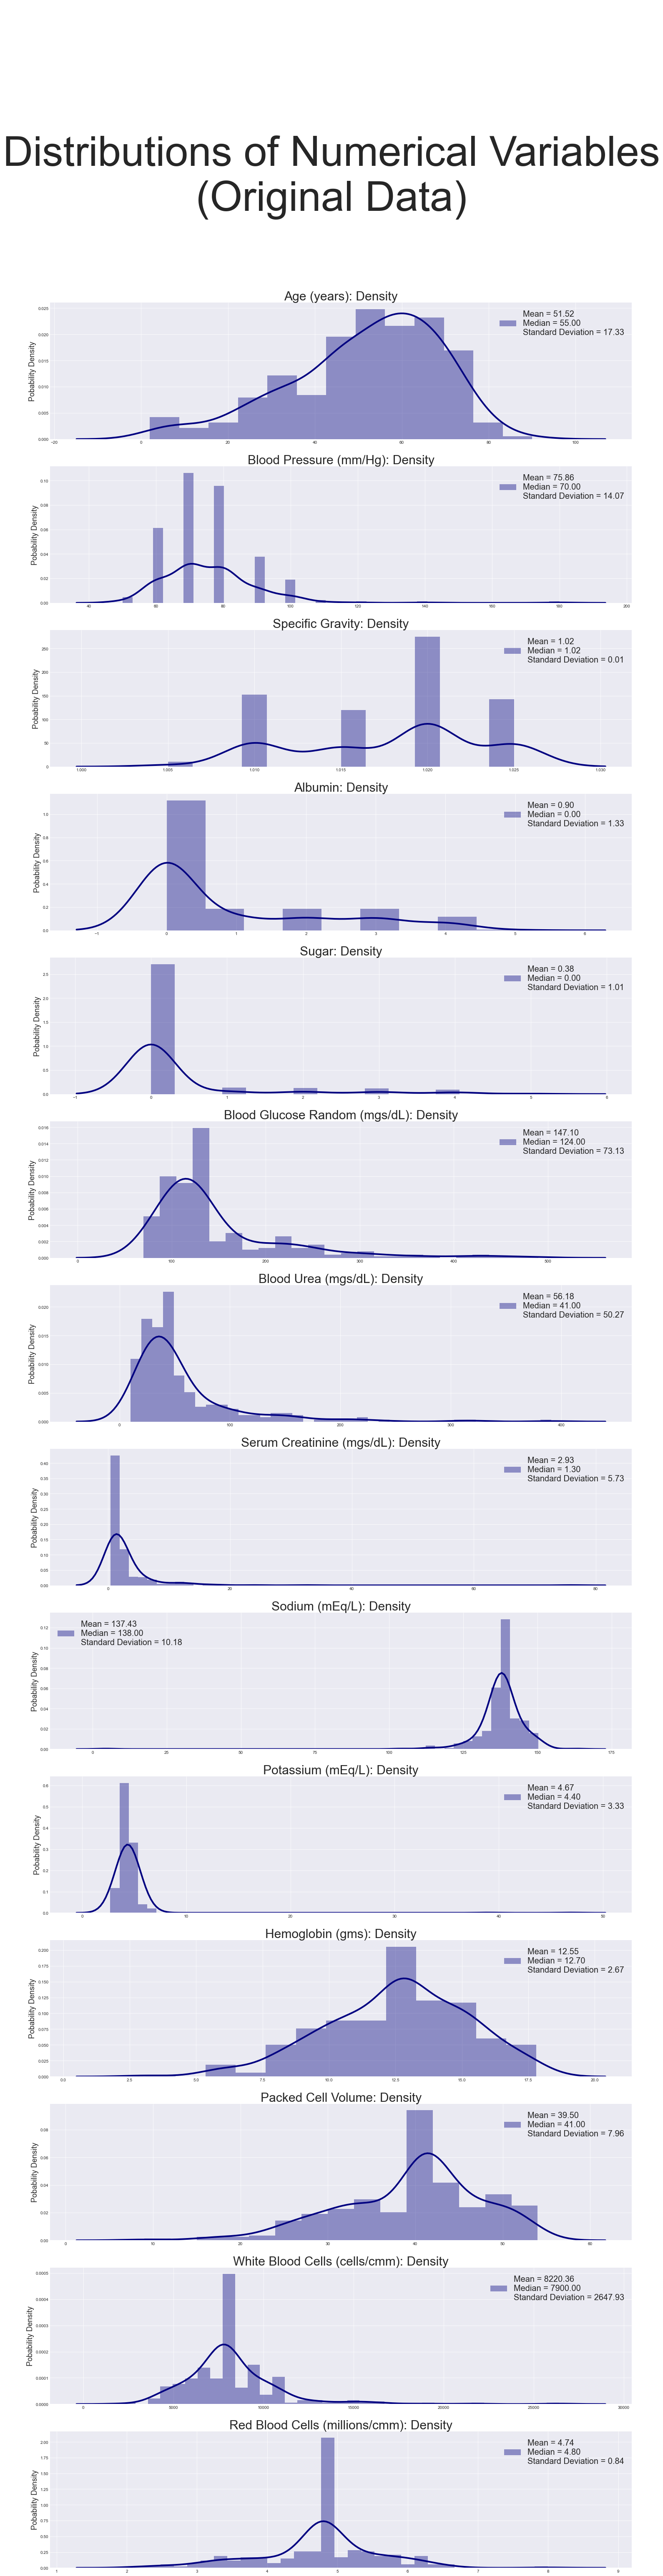

In [21]:
n_rows, n_cols = (14,1)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

for i in range(len(numeric)):
    col=numeric[i]
    
    label="Mean = {}\nMedian = {}\nStandard Deviation = {}".format("%.2f"%data[col].mean(),
                                                                    "%.2f"%data[col].median(),
                                                                    "%.2f"%data[col].std())
    
    graph1=sns.distplot(data[col], color="navy", ax=axes[i], kde_kws={"lw":4}, norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i].set_title(col+': Density',fontsize=30)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel("Pobability Density",fontsize=18)

    
    
    
plt.show()

##### Finding the Corelation matrix between the Values of Variables

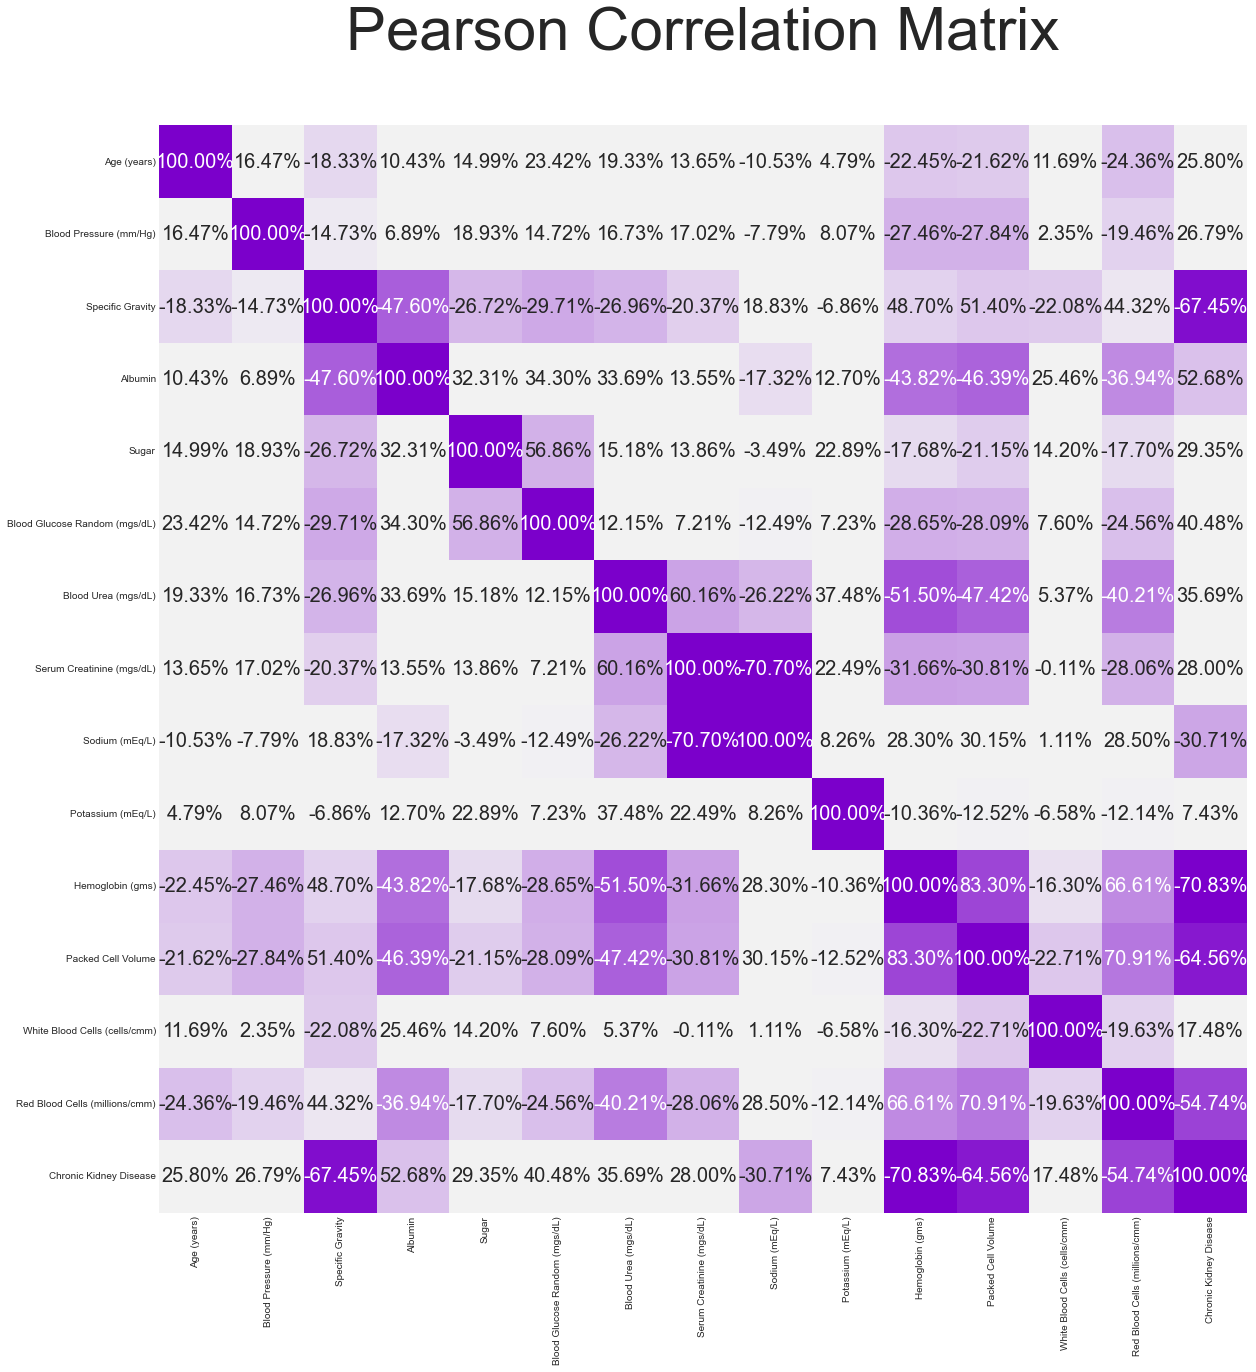

In [15]:
numericdat=data.drop(categorical, axis=1, inplace=False)

plt.figure(figsize=(20,20))

sns.heatmap(numericdat.corr("pearson"),
            cmap=sns.diverging_palette(280, 280, s=100, l=35, as_cmap=True,sep=80),
            square=True,
            annot=True,
            annot_kws={'fontsize':20},
            fmt='.2%',
            cbar=False)
plt.title("Pearson Correlation Matrix\n",fontsize=60)
plt.show()

These are the **CorrelationMatrix** of the Variables

#### Now Draw the graph for relation between Categorical and Target *("Chronic Kidney Disease")* Values:

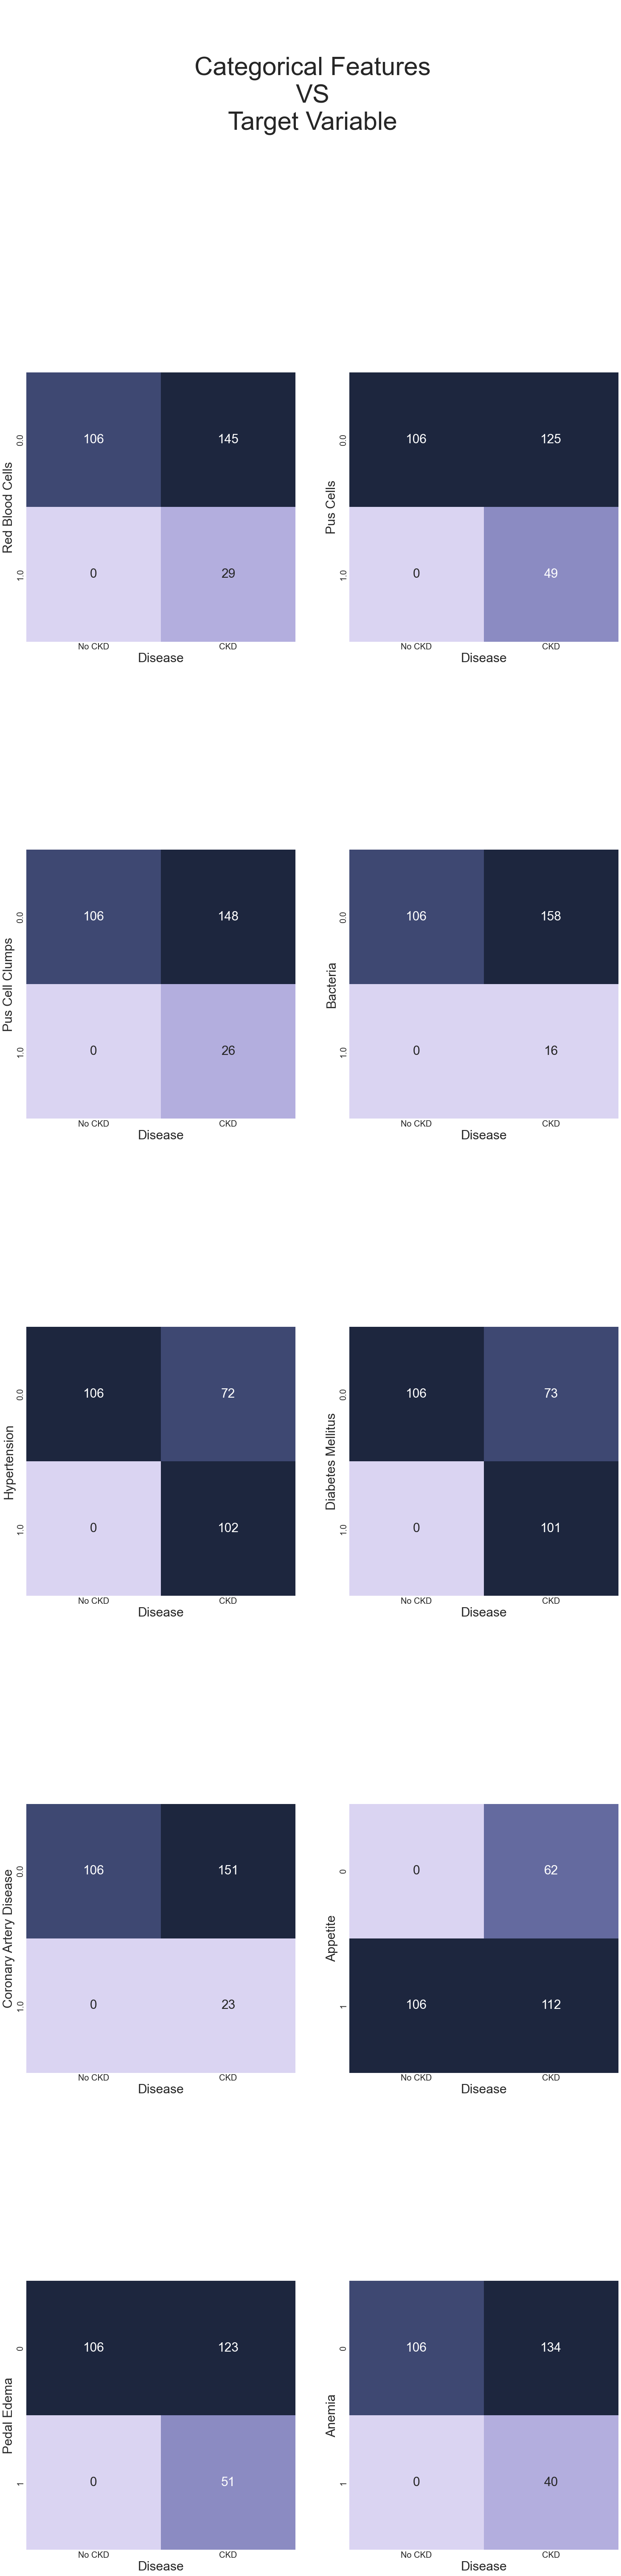

In [22]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=60)

for index, column in enumerate(categorical):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':30},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=30)

    axes[i,j].set_ylabel(column,fontsize=30)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=20)

plt.show()


#### This is Some ***Visualization and Analysis*** of the Data that we Cleaned to find the Correlation between the values of the Features.
#### We analyse ***Numeric and Categoical*** varables values seprately Because they cannot be done together.

#### Now analyse part is done Now we'll move onto the model training part.